In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [32]:
df = pd.read_csv("kmeans(Mall_Customers).csv")

In [33]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


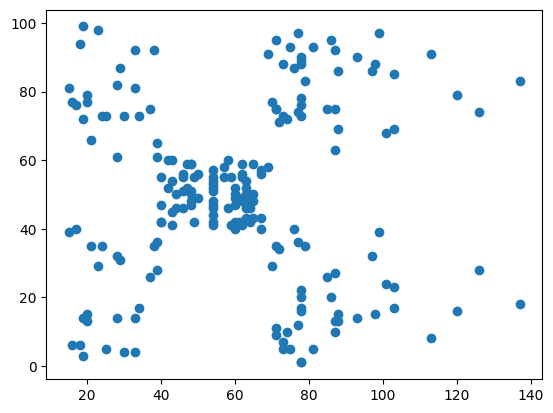

In [35]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [36]:
#Elbow Method
wcss = []
k_range = range(1,11)
for i in k_range:
    kmean = KMeans(n_clusters = i)
    kmean.fit(df)
    wcss.append(kmean.inertia_)

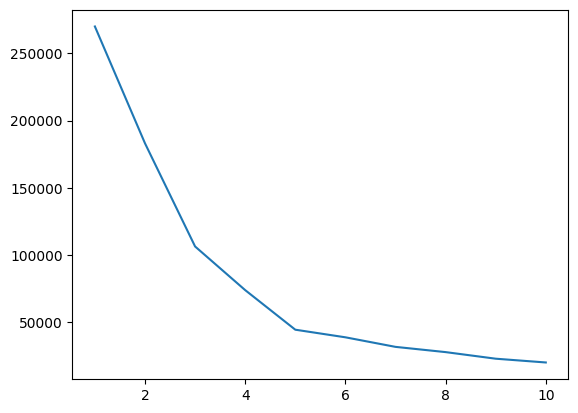

In [37]:
plt.plot(k_range,wcss)

In [38]:
kmean = KMeans(n_clusters=6)
kmean.fit(df)

KMeans(n_clusters=6)

In [39]:
df["Clusters"] = kmean.labels_

In [40]:
df

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


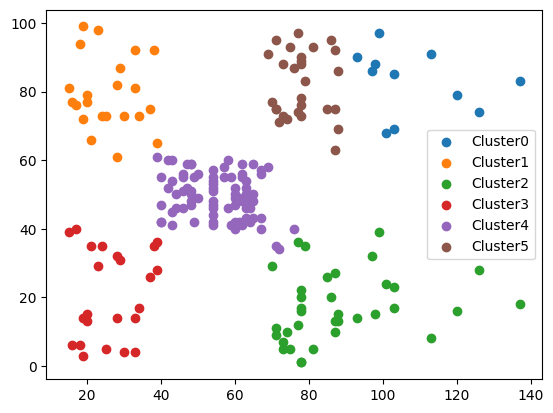

In [41]:
for i in range(6):
    plt.scatter(
        df.loc[df["Clusters"]==i,"Annual Income (k$)"],
        df.loc[df["Clusters"]==i,"Spending Score (1-100)"],
        label = f"Cluster{i}"
    )
plt.legend()